In [3]:
import numpy as np
import matplotlib.pyplot as plt

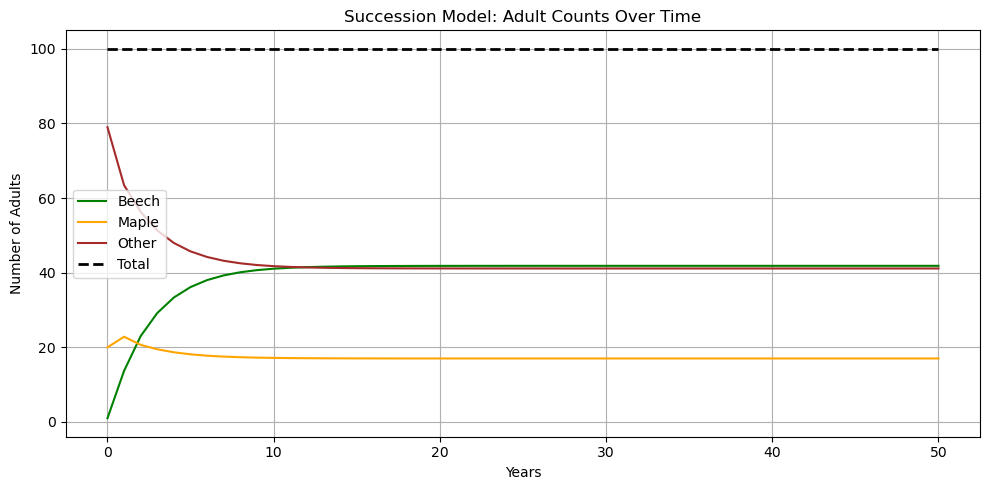

In [4]:
def succession_model(years, initial_population_vector):
    A = np.array([
        [0.8,  0.25, 0.1],
        [0.1,  0.15, 0.25],
        [0.1,  0.6,  0.65],
    ], dtype=float)

    n_t = np.array(initial_population_vector, dtype=float)
    num_stages = A.shape[0]

    stage_populations = [[] for _ in range(num_stages)]
    total_population = []

    # initial values
    for i in range(num_stages):
        stage_populations[i].append(n_t[i])
    total_population.append(n_t.sum())

    # simulate
    for year in range(years):
        n_t = A.dot(n_t)
        total = n_t.sum()
        for i in range(num_stages):
            stage_populations[i].append(n_t[i])

        total_population.append(total)

    return stage_populations, total_population

# Parameters
years = 50
initial_population_vector = [1, 20, 79]  # n0

# Run
stage_pops, total_pop = succession_model(years, initial_population_vector)

# Plot: actual numbers
x_vals = list(range(years + 1))
labels = ['Beech', 'Maple', 'Other']
colors = ['green', 'orange', 'brown']

plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(x_vals, stage_pops[i], label=f'{labels[i]}', color=colors[i])
plt.plot(x_vals, total_pop, label='Total', color='black', linestyle='--', linewidth=2)
plt.xlabel('Years')
plt.ylabel('Number of Adults')
plt.title('Succession Model: Adult Counts Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


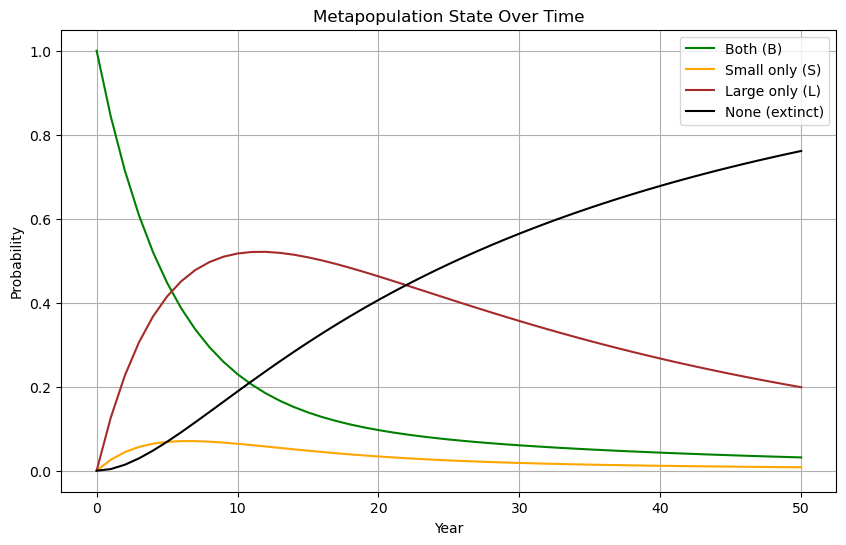

In [21]:
# rename parameters
e_B = 0.13
e_A = 0.03
c_B = 0.02  # colonization rate into B (small)
c_A = 0.02  # colonization rate into A (large)

# Construct transition matrix P where rows sum to 1 and P[i,j] = P(next state = j | current state = i)
P = np.zeros((4,4))

# From Both occupied (B): possible events are extinction in A, B, both, or neither.
p_b_to_none = e_B * e_A
p_b_to_small = (1 - e_B) * e_A   # only A goes extinct -> Small-only
p_b_to_large = e_B * (1 - e_A)   # only B goes extinct -> Large-only
p_b_to_both = (1 - e_B) * (1 - e_A)
P[0, 0] = p_b_to_both
P[0, 1] = p_b_to_small
P[0, 2] = p_b_to_large
P[0, 3] = p_b_to_none

# From Small-only (S): small occupied, large empty.
# recolonization of large (A) happens at rate c_A.
P[1, 0] = c_A * (1 - e_B)        # recolonize A and small survives -> Both
P[1, 2] = c_A * e_B              # recolonize A and small extinct -> Large-only
P[1, 1] = (1 - c_A) * (1 - e_B)  # no recolonize and small survives -> Small-only
P[1, 3] = (1 - c_A) * e_B        # no recolonize and small extinct -> None

# From Large-only (L): recolonization of small (B) happens at rate c_B.
P[2, 0] = c_B * (1 - e_A)        # recolonize B and large survives -> Both
P[2, 1] = c_B * e_A              # recolonize B and large extinct -> Small-only
P[2, 2] = (1 - c_B) * (1 - e_A)  # no recolonize and large survives -> Large-only
P[2, 3] = (1 - c_B) * e_A        # no recolonize and large extinct -> None

# From None (absorbing)
P[3, 3] = 1.0

# Verify rows sum to 1
row_sums = P.sum(axis=1)
assert np.allclose(row_sums, 1.0), f"Rows sums not 1: {row_sums}"

# initial distribution (both occupied)
p0 = np.array([1.0, 0.0, 0.0, 0.0])
history = np.zeros((num_years + 1, 4))
history[0] = p0
for t in range(1, num_years + 1):
    history[t] = history[t - 1].dot(P)

# Plot results
plt.figure(figsize=(10,6))
for i, label in enumerate(["Both (B)", "Small only (S)", "Large only (L)", "None (extinct)"]):
    plt.plot(history[:, i], label=label, color=colors_states[i])
plt.xlabel("Year")
plt.ylabel("Probability")
plt.title("Metapopulation State Over Time")
plt.legend()
plt.grid()
plt.show()


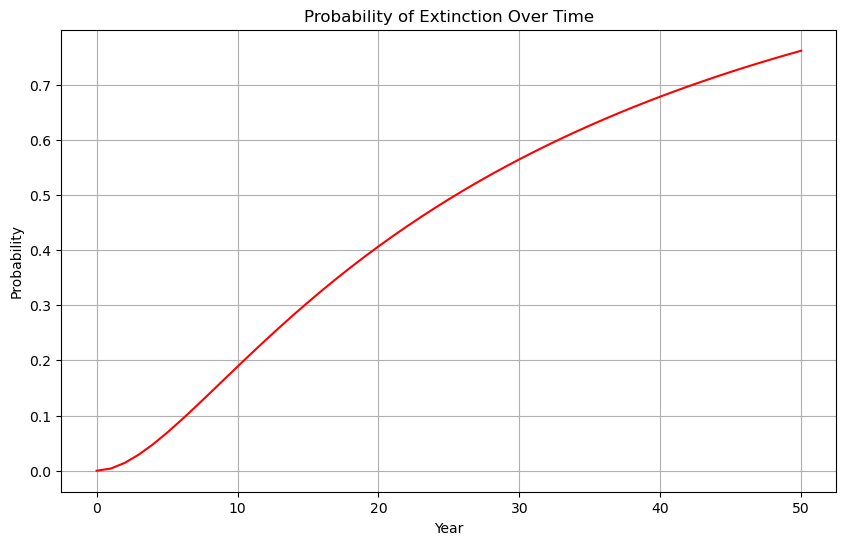

In [22]:
# Graph the only the red line
plt.figure(figsize=(10,6))
plt.plot(history[:, 3], label="None", color='red')
plt.xlabel("Year")
plt.ylabel("Probability")
plt.title("Probability of Extinction Over Time")    
plt.grid()
plt.show()